In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/sample_data/amazon_alexa_reviews.tsv", delimiter = "\t", quoting = 3)
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
print(f"Data shape : {data.shape}")

Data shape : (3150, 5)


In [ ]:
 # Column/ Feature names
 print(f"Data featuers : {data.columns.values}")

Data featuers : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


<h3>Checking for null values</h3>

In [ ]:
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [ ]:
# getting the record where the verified_reviews is null
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [ ]:
# dropping the record with null value
data.dropna(inplace = True)

In [ ]:
print(f"Shape of data after removing null records : {data.shape}")

Shape of data after removing null records : (3149, 5)


<h3>Analysing the verified reviews column</h3>

In [ ]:
# adding a new column length, which would store the length of the reviews posted by the customer

data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
data.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64
length,int64


length, feedback and rating are integer values while other columns, date, variation and verified reviews are of data type string

<h3>Analysing the rating column in the dataset</h3>

In [ ]:
print(f"Count of each rating value : {data['rating'].value_counts()}")

Count of each rating value : rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


modified data

1+2 ratings = 256
3 (50) + 4(100) + 5(198) = 348

In [ ]:
# calculating the percentages of each rating class
print(f"Rating value count --> Percentage distribution {round(data['rating'].value_counts()/data.shape[0] * 100, 2)}")

Rating value count --> Percentage distribution rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


Considering ratings 3, 4, 5 as Positve review
ratings 1,2 as Negative review

<h3>Plotting the ratings distribution</h3>

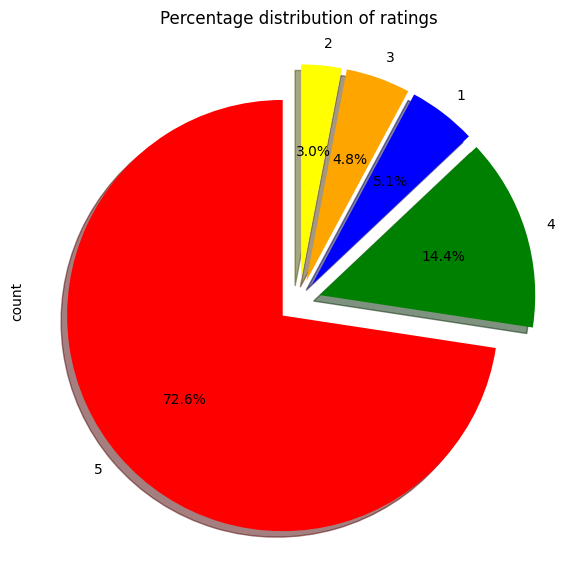

In [ ]:
from io import BytesIO
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7,7))
colors = ('red', 'green', 'blue', 'orange', 'yellow')
wp = {'linewidth' : 1, 'edgecolor' : 'black'}
sections = data['rating'].value_counts()/data.shape[0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
sections.plot(kind = 'pie', autopct = '%1.1f%%',shadow = True, colors = colors, explode = explode, startangle = 90, title = 'Percentage distribution of ratings')
graph = BytesIO()
fig.savefig(graph, format = 'png')

<h3>Analysing the 'feedback' column</h3>

In [ ]:
# Distinct values of feedback and its count

print(f"Feedback value count \n{data['feedback'].value_counts()}")

Feedback value count 
feedback
1    2893
0     256
Name: count, dtype: int64


In [ ]:
# reviews with feedback 0 and feedback 1

feedback_0_review = data[data['feedback'] == 0].iloc[1]['verified_reviews']
feedback_1_review = data[data['feedback'] == 1].iloc[1]['verified_reviews']

print(f"Review with Feedback 0 : {feedback_0_review}")
print(f"Review with Feedback 1 : {feedback_1_review}")

Review with Feedback 0 : Sound is terrible if u want good music too get a bose
Review with Feedback 1 : Loved it!


feedback 0 is negative review and 1 is positive review

In [ ]:
# feedback 0 is negative review and 1 is positive review

print(f"Feedback percentage distribution \n{round(data['feedback'].value_counts()/data.shape[0] * 100, 2)}")

Feedback percentage distribution 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


Feedback distribution

91.87% reviews are positive
8.13% reviews are negative

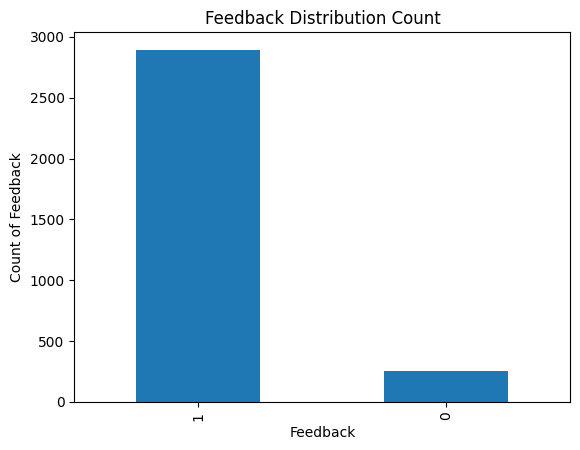

In [ ]:
# plotting the feedback column value count

data['feedback'].value_counts().plot.bar()
plt.title('Feedback Distribution Count')
plt.xlabel('Feedback')
plt.ylabel('Count of Feedback')
plt.show()

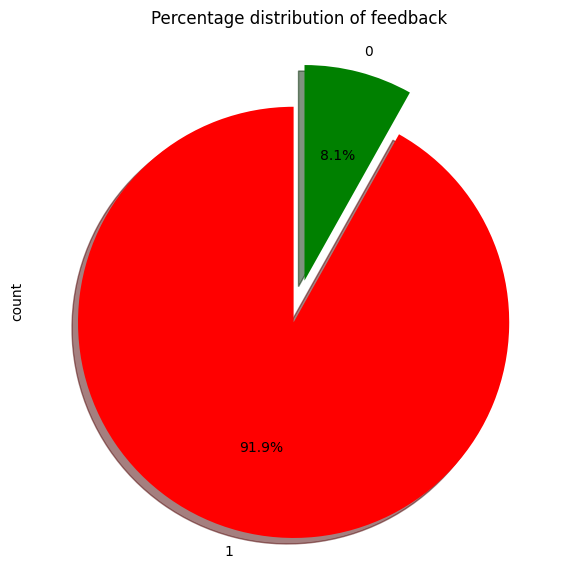

In [ ]:
fig = plt.figure(figsize = (7,7))
colors = ('red', 'green')
wp = {'linewidth' : 1, 'edgecolor' : 'black'}
sections = data['feedback'].value_counts()/data.shape[0]
explode = (0.1, 0.1)
sections.plot(kind = 'pie', autopct = '%1.1f%%',shadow = True, colors = colors, explode = explode, startangle = 90, title = 'Percentage distribution of feedback')
graph = BytesIO()
fig.savefig(graph, format = 'png')

<h3>Analysing the 'variation' column</h3>

In [ ]:
data['variation'].value_counts()

,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


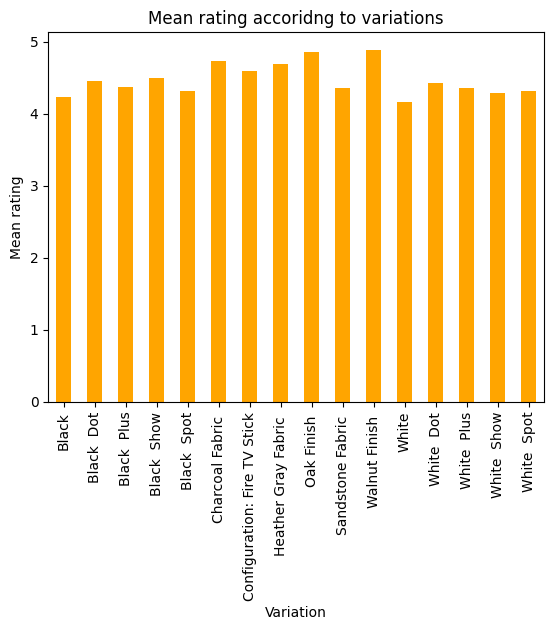

In [ ]:
# graph to visualize the total counts of each variation

data.groupby('variation')['rating'].mean().plot.bar(color = 'orange')
plt.title('Mean rating accoridng to variations')
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

<h3>Analysing the 'length' column</h3>

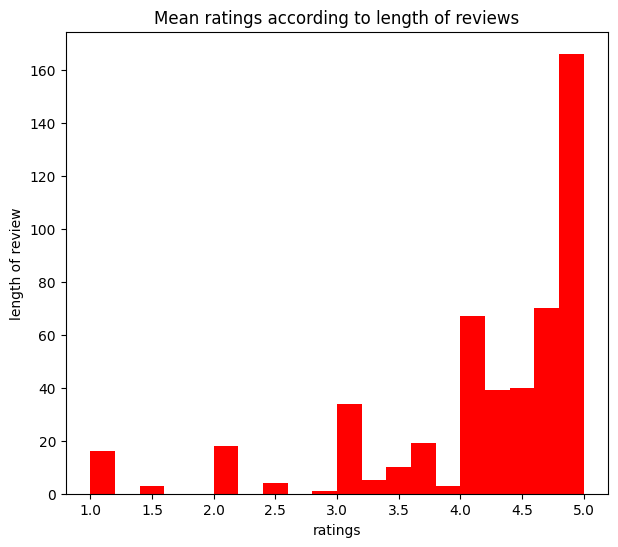

In [ ]:
data.groupby('length')['rating'].mean().plot.hist(color = 'red', figsize = (7,6), bins = 20)
plt.title('Mean ratings according to length of reviews')
plt.xlabel('ratings')
plt.ylabel('length of review')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

def remove_negation_words(stop_words):
  stop_words_set = set()
  for word in stop_words:
    new_word = re.sub(r"n't*", " not", word)
    for individual_word in new_word.split(" "):
      if(individual_word != "not"):
        stop_words_set.add(individual_word)
  return stop_words_set

In [ ]:
modified_stopwords_list = remove_negation_words(stop_words)
print(modified_stopwords_list)

{'just', 'yours', 'more', 'having', 'don', 'shan', 'yourself', 'during', 'if', 'until', 'so', 'between', 'our', 'down', 'own', 'he', 'wasn', 'we', 'hasn', 'most', 'with', 'll', 'other', 'isn', "that'll", 'some', 'is', 'does', 'off', 'while', 'under', 'she', 'nor', 'here', 'those', 'no', 'why', 'below', 'had', 'what', 're', 'whom', 'should', 'hers', 'aren', 'was', 'might', "she's", 'your', 'to', 'haven', 'in', 'against', 'when', 've', 'being', 'the', 'been', "you've", 'be', 'me', 'were', 'have', 'couldn', 'each', 'their', 'as', 'itself', 'o', 'once', 'or', 'that', 'hadn', 'do', 'few', 'sha', 'because', 'shouldn', 'yourselves', 'them', 'they', 'about', 'above', 'd', 'ourselves', 'ma', 'again', 'which', 'weren', "you'd", 'out', 'i', 'how', "should've", "you'll", 'himself', 'mustn', 'doing', 'are', 'but', 'where', 'themselves', 'now', 'of', 'has', 'ours', 'there', 'wo', 'her', 'for', 'further', 'at', 'will', 'doesn', 'both', 't', 'his', 'too', 'from', 'm', 's', 'then', 'these', 'before', '

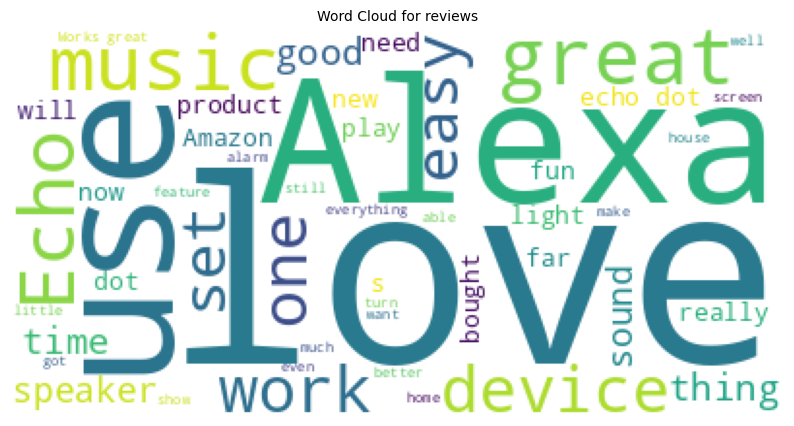

In [ ]:
from wordcloud import WordCloud

reviews_string = " ".join([review for review in data['verified_reviews']])
word_cloud = WordCloud(background_color = "white", max_words = 50)
plt.figure(figsize = (10, 10))
plt.imshow(word_cloud.generate(reviews_string))
plt.title("Word Cloud for reviews", fontsize = 10)
plt.axis("off")
plt.show()

In [ ]:
# splitting words into positive and negative feedback categories

negative_reviews_string = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
negative_reviews_list = negative_reviews_string.lower().split()

positive_reviews_string = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
positive_reviews_list = positive_reviews_string.lower().split()

unique_negative_reviews = [negative_review for negative_review in negative_reviews_list if negative_review not in positive_reviews_list]
unique_negative_reviews_string = " ".join(unique_negative_reviews)

unique_positive_reviews = [positive_review for positive_review in positive_reviews_list if positive_review not in negative_reviews_list]
unique_positive_reviews_string = " ".join(unique_negative_reviews)

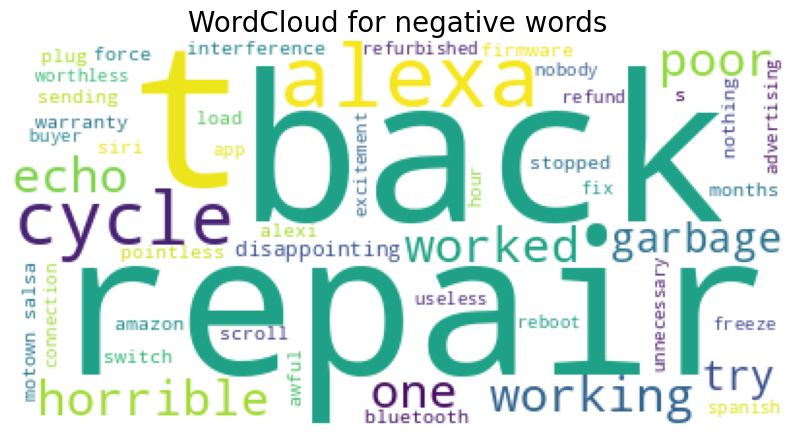

In [ ]:
# generating word cloud for each category of reviews
word_cloud_for_negative_reviews = WordCloud(background_color = "white", max_words = 50)
plt.figure(figsize = (10, 10))
plt.imshow(word_cloud_for_negative_reviews.generate(unique_negative_reviews_string))
plt.title("WordCloud for negative words", fontsize = 20)
plt.axis("off")
plt.show()

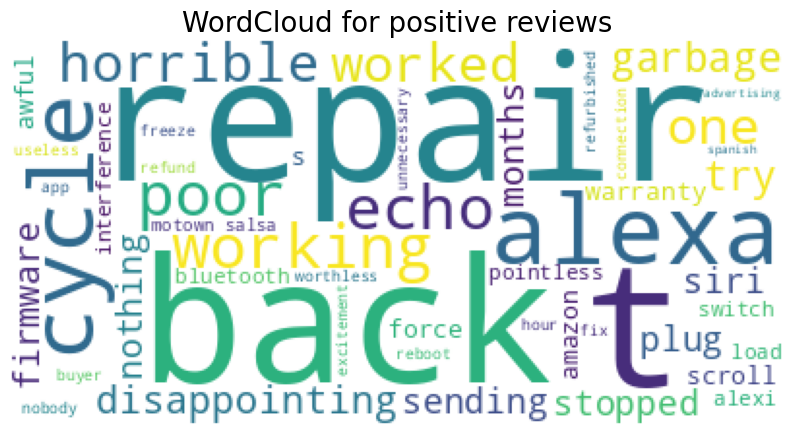

In [ ]:
word_cloud_for_positive_reviews = WordCloud(background_color = "white", max_words = 50)
plt.figure(figsize = (10, 10))
plt.imshow(word_cloud_for_positive_reviews.generate(unique_positive_reviews_string))
plt.title("WordCloud for positive reviews", fontsize = 20)
plt.axis("off")
plt.show()

<h3>Preprocessing and Modeling</h3>

We build the corpus of the verified reviews.
* Corpus is the collection of authentic text from the dataset (Authentic means the stem word of the text, which is done using PorterStemmer)


We follow the following steps to build the corpus for the verified reviews in the dataset:
* Replacing non alphabet words to emplty string using regex
* Converting the string into lowercase and splitting into a list of its words
* Iterating through the words list and adding the stemmed form of the word in the corpus. This is only done if the word is not in our modified stopwords list.

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
corpus = []

for i in range(data.shape[0]):
  reviews_string = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  reviews_list = reviews_string.lower().split()
  reviews_without_stopwords_list = [individual_review_word for individual_review_word in reviews_list if individual_review_word not in modified_stopwords_list]
  reviews_with_stemmed_words = [stemmer.stem(word) for word in reviews_without_stopwords_list]
  reviews_stemmed_string = " ".join(reviews_with_stemmed_words)
  corpus.append(reviews_stemmed_string)

<h3>Using CountVectorizer to create bag of words</h3>

Vectorization is the process where the corpus of the text would be converted into a matrix containing 0's and 1's.
We will use the 'bag of words technique' to do vectorization.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# considering the top 2500 features
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#count vectorizer gives the frequency of each token present in the corpus
corpus_word_count = cv.vocabulary_

# getting the first 10 words from the corpus with its corresponding count
corpus_word_count_map = dict(list(corpus_word_count.items())[:10])
corpus_word_count_map

{'love': 1302,
 'echo': 748,
 'sometim': 1974,
 'play': 1612,
 'game': 987,
 'answer': 119,
 'question': 1696,
 'correctli': 534,
 'alexa': 76,
 'say': 1807}

In [ ]:
# storing this count vector in pickled file
import os
import pickle

# exist ok true would avoid raising an error in case the folder already exists
os.makedirs('Models', exist_ok = True)
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [ ]:
print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")

X shape : (3149, 2500)
y shape : (3149,)


we have 2500 features in X, as we had set max_features in count vectorizer to 2500

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train shape : {X_train.shape}")
print(f"X test shape : {X_test.shape}")
print(f"y train shape : {y_train.shape}")
print(f"y test shape : {y_test.shape}")

X train shape : (2204, 2500)
X test shape : (945, 2500)
y train shape : (2204,)
y test shape : (945,)


In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(f"X train maximum value : {X_train.max()}")
print(f"X test maximum value : {X_test.max()}")

# printing first 5 rows of traning dataset
print("First 5 rows of traning dataset")
print(X_train[:5])

X train maximum value : 12
X test maximum value : 10
First 5 rows of traning dataset
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<h3>MinMax Scaler</h3>

* MinMax scaler is a variant to normalise the training data.
  (Normalising the data - bringing the numerical data to a uniform scale)
**Use Case* : Faster learning and converging of machine learning model. (gradient makes uniform changes and does not make large jumps due to different scales)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# saving the scaled data in pickle file
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

<h3>Random forest</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# fitting x scaled and y traning dataset
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predicting on the test dataset
y_predictions_rf = model_rf.predict(X_test)

<h3>Confusion Matrix</h3>

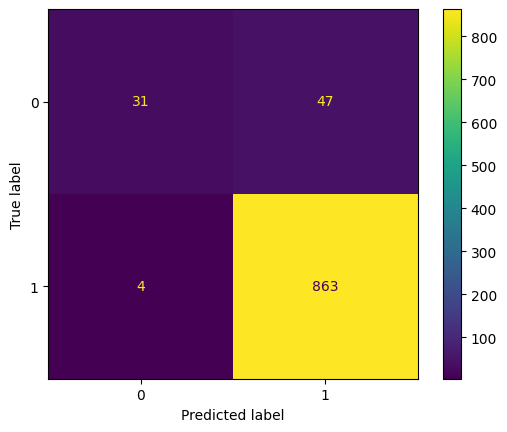

In [ ]:
# Finding the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_rf = confusion_matrix(y_test, y_predictions_rf)
confusion_matrix_rf_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = model_rf.classes_)
confusion_matrix_rf_display.plot()
plt.show()

<h3>Accuracy of the Random Forest Classifier Model</h3>

Calculating accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score

training_accuracy_score_rf = model_rf.score(X_train, y_train)
testing_accuracy_score_rf = accuracy_score(y_test, y_predictions_rf)

print(f"Training Accuracy Score for Random Forest Classifier: {training_accuracy_score_rf}")
print(f"Testing Accuracy Score for Random Forest Classifier: {testing_accuracy_score_rf}")

Training Accuracy Score for Random Forest Classifier: 0.9954627949183303
Testing Accuracy Score for Random Forest Classifier: 0.946031746031746


In [ ]:
#Saving the Random Forest classifier
pickle.dump(model_rf, open('Models/model_rf.pkl', 'wb'))

<h3>ROC Curve & AUC for Random Forest Classifier Model</h3>

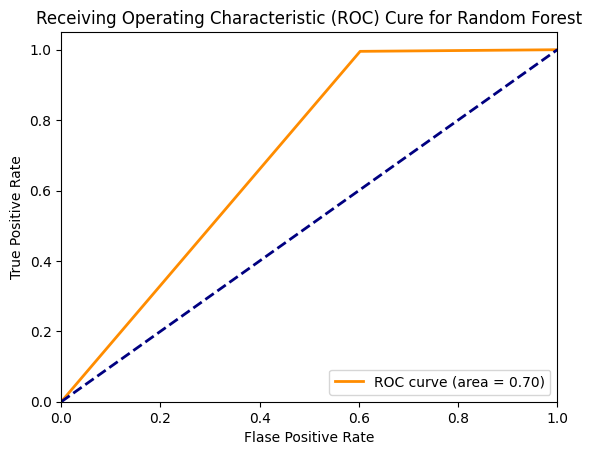

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_predictions_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color = "darkorange", lw = 2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiving Operating Characteristic (ROC) Cure for Random Forest')
plt.legend(loc = "lower right")
plt.show()

<h3>Decision Tree Classifier</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predictions_dt = model_dt.predict(X_test)

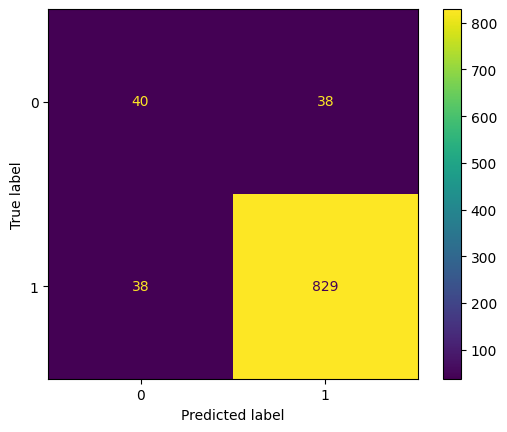

In [ ]:
confusion_matrix_dt = confusion_matrix(y_test, y_predictions_dt)
confusion_matrix_dt_display = ConfusionMatrixDisplay(confusion_matrix_dt, display_labels = model_dt.classes_)
confusion_matrix_dt_display.plot()
plt.show()

<h3>Accuracy of the Decision Tree Classifier Model</h3>

In [ ]:
from sklearn.metrics import accuracy_score

training_accuracy_score_dt = model_dt.score(X_train, y_train)
testing_accuracy_score_dt = accuracy_score(y_test, y_predictions_dt)

print(f"Training Accuracy Score for Decision Tree Classifier: {training_accuracy_score_dt}")
print(f"Testing Accuracy Score for Decision Tree Classifier: {testing_accuracy_score_dt}")

Training Accuracy Score for Decision Tree Classifier: 0.9954627949183303
Testing Accuracy Score for Decision Tree Classifier: 0.9195767195767196


<h3>ROC Curve & AUC for Decision Tree Classifier Model</h3>

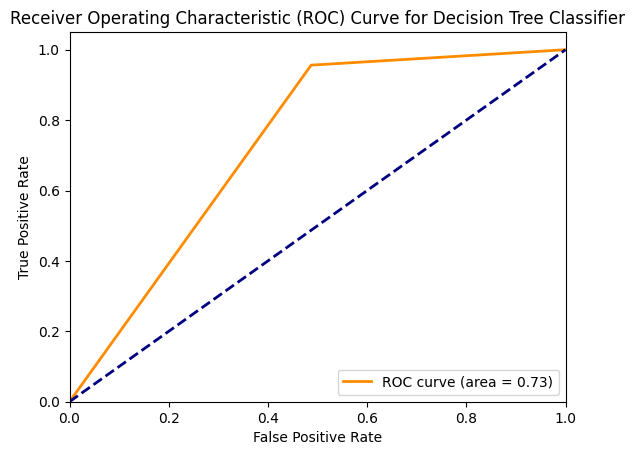

In [ ]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_predictions_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting the ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#Saving the Decision Tree classifier
pickle.dump(model_dt, open('Models/model_dt.pkl', 'wb'))

<h3>XGBoost Model</h3>

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_predictions_xgboost = model_xgboost.predict(X_test)

Plotting Confusion Matrix

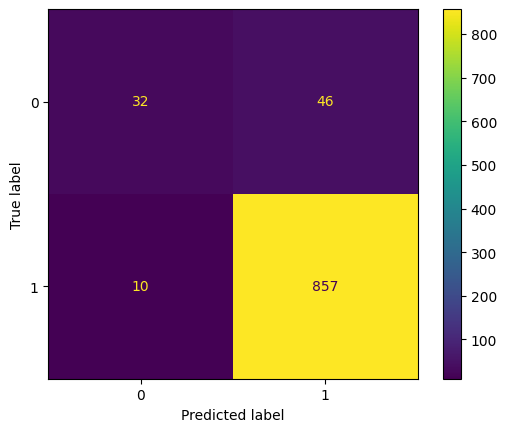

In [ ]:
confusion_matrix_xgboost = confusion_matrix(y_test, y_predictions_xgboost)
confusion_matrix_xgboost_display = ConfusionMatrixDisplay(confusion_matrix_xgboost, display_labels = model_xgboost.classes_)
confusion_matrix_xgboost_display.plot()
plt.show()

Calculating Accuracy of XGBoost Model

In [ ]:
training_accuracy_score_xgboost = model_xgboost.score(X_train, y_train)
testing_accuracy_score_xgboost = accuracy_score(y_test, y_predictions_xgboost)

print(f"Training Accuracy Score for XGBoost Classifier Model : {training_accuracy_score_xgboost}")
print(f"Testing Accuracy Score for XGBoost Classifier Model : {testing_accuracy_score_xgboost}")

Training Accuracy Score for XGBoost Classifier Model : 0.9718693284936479
Testing Accuracy Score for XGBoost Classifier Model : 0.9407407407407408


Plotting the ROC and AUC curve for XGBoost Classifier Model

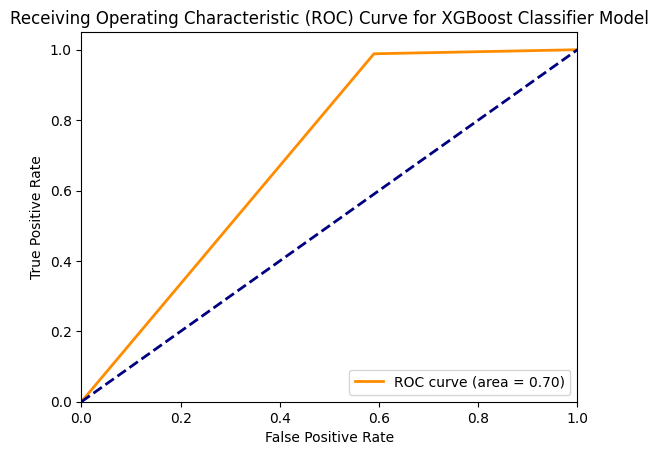

In [ ]:
fpr_xgboost, tpr_xgboost, thresholds = roc_curve(y_test, y_predictions_xgboost)
roc_auc_xgboost = auc(fpr_xgboost, tpr_xgboost)
plt.figure()
plt.plot(fpr_xgboost, tpr_xgboost, color = "darkorange", lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc_xgboost)
plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiving Operating Characteristic (ROC) Curve for XGBoost Classifier Model')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
train_scores = []
test_scores = []
train_yhat = model_xgboost.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)
train_scores.append(train_acc)

test_yhat = model_xgboost.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
test_scores.append(test_acc)

test_scores

[0.9407407407407408]

<h3>Performace comparision for all the models</h3>

In [ ]:
#Saving the XGBoost classifier
pickle.dump(model_xgboost, open('Models/model_xgb.pkl', 'wb'))

In [ ]:
# Define models and their respective testing and training scores

models = ["Random Forest Classifier", "Decision Tree Classifier", "XGBoost"]
training_accuracy_scores = [training_accuracy_score_rf, training_accuracy_score_dt, training_accuracy_score_xgboost]
testing_accuracy_scores = [testing_accuracy_score_rf, testing_accuracy_score_dt, testing_accuracy_score_xgboost]

# Calculating difference between the training and testing accuracy scores
difference_in_accuracies = [abs(training_score - testing_score) for training_score, testing_score in zip(training_accuracy_scores, testing_accuracy_scores)]

# Sorting models based on theier differences in their accuracies
sorted_indices = np.argsort(difference_in_accuracies)
sorted_models = [models[index] for index in sorted_indices]
sorted_training_accuracies = [training_accuracy_scores[index] for index in sorted_indices]
sorted_testing_accuracies = [testing_accuracy_scores[index] for index in sorted_indices]
print(sorted_models)

['XGBoost', 'Random Forest Classifier', 'Decision Tree Classifier']


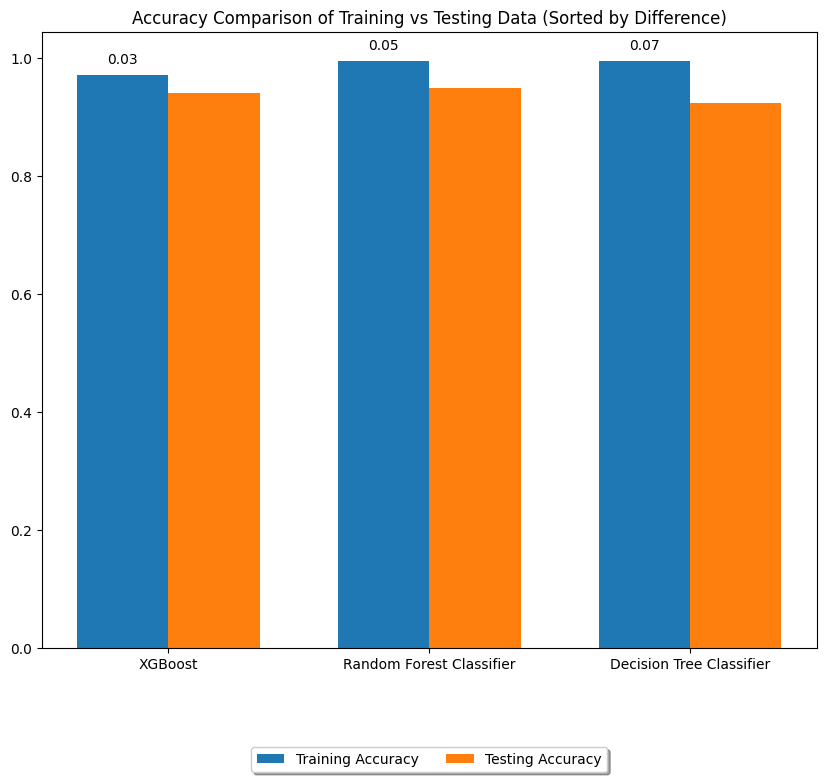

In [ ]:
# Defining x position of the bars
x = np.arange(len(models))
width = 0.35

plt.figure(figsize = (10, 8))
train_bars = plt.bar(x - width/2, sorted_training_accuracies, width, label = 'Training Accuracy')
test_bars = plt.bar(x + width/2, sorted_testing_accuracies, width, label = 'Testing Accuracy')
plt.title('Accuracy Comparison of Training vs Testing Data (Sorted by Difference)')
plt.xticks(x, sorted_models)

for train_bar, test_bar in zip(train_bars, test_bars):
  height = max(train_bar.get_height(), test_bar.get_height())
  difference = abs(train_bar.get_height() - test_bar.get_height())
  plt.text(train_bar.get_x() + train_bar.get_width()/2, height + 0.02, f'{difference:.2f}', horizontalalignment ='center')

# Plot legend at the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Show plot
plt.show()

<h3>Analysis and Conclusion</h3>

* The bar graphs illustrate the accuracy of each model on both training and testing data, with the differences in accuracies also highlighted.
* It was observed that although the Decision Tree model achieved the highest accuracy on the training data, its performance on the testing data was significantly lower, indicating overfitting.
* A similar trend was noted for the Random Forest model.
* Based on the analysis, the XGBoost model emerged as the most reliable, with a commendable 97% accuracy on the training data and 95% accuracy on the testing data, making it the best choice for analyzing the Alexa reviews dataset.